In [4]:
!pip install torch torchvision torchaudio

  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/20/ac/ab6f42af83349e679b03c9bb18354740c6b58b17dba329fb408730230584/torchvision-0.16.0-cp311-cp311-win_amd64.whl.metadata
  Using cached torchvision-0.16.0-cp311-cp311-win_amd64.whl.metadata (6.6 kB)
  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/11/30/715101782513f94c834ebe3afb9a29b0fae1121f64963db9d39fb80da53e/torchaudio-2.1.0-cp311-cp311-win_amd64.whl.metadata
  Using cached torchaudio-2.1.0-cp311-cp311-win_amd64.whl.metadata (5.7 kB)
Using cached torchvision-0.16.0-cp311-cp311-win_amd64.whl (1.3 MB)
Using cached torchaudio-2.1.0-cp311-cp311-win_amd64.whl (2.3 MB)
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/74/07/edce54779f5c3fe8ab8390eafad3d7c8190fce68f922a254ea77f4a94a99/torch-2.1.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for torchvision from https://files.pythonhos

In [5]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [8]:
!cd yolov5 & pip install -r requirements.txt

In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

### 2) Load Model

In [10]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

C:\Users\I574035\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\I574035/.cache\torch\hub\master.zip
YOLOv5  2023-10-5 Python-3.11.2 torch-2.1.0+cpu CPU

100%|██████████████████████████████████████████████████████████████████████████████| 14.1M/14.1M [00:18<00:00, 799kB/s]

Fusing layers... 
YOLOv5s sum

In [11]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

### Train from Scratch

In [3]:
import uuid # We use it to create unique identifier. This is going to name the images
import os
import time # We use it to take a bit of time between the images we are collecting

In [15]:
# We need to update the code we used before, to not just capture the real time feed but also save the images for our different classes
IMAGES_PATH = os.path.join('data', 'images')
#We specify our top folder to be 'data', and our subsequent folder to be 'images'. So all the images are going to be saved
#in a folder named /data/images

labels = ['awake', 'drowsy']
number_imgs = 20 #collect 20 images for each category
#We are going to then kable them using a library (or packeage) called label image

In [18]:
# We now capture images and save them in the folder data\images
cap = cv2.VideoCapture(0)

#Loop through labels
for label in labels: #we loop hrough our labels ('awake', 'drowsy')
    print("Collecting images for {}".format(label))
    time.sleep(5) #We want to sleep for 5 seconds when we are transitioning between each of our lables
    
    #Loop through images
    for img_number in range(number_imgs):
        print("Collecting images for {}, image number {}".format(label, img_number))
        
        # We are reading the feed from our webcam
        red, frame = cap.read()
        
        #Naming image path
        img_name = os.path.join(IMAGES_PATH, label + '.' + str(uuid.uuid1()) + '.jpg') #Full path (something like data\images\awake.xxxxxx.jpg)
        #We create a unique identifier for each image so that they do not overlap or overwirte each other, by using the
        #function uuid.uuid1()
        
        #Write image to file
        cv2.imwrite(img_name, frame)
        #frame we capture from webcam
        
        #Render to the screen the image result
        cv2.imshow('Image Collection', frame)
        
        #We give a bit of time (2 second delay) between captures
        time.sleep(2)
        
    #Here have the same piece of code as before to quite the camera video
    #Here we exit out out this gracefully:
        if cv2.waitKey(10) & 0xFF == ord('q'): # if the check passes, we are gonna break out of the while loop
            break 

#here we do some cleanup:
cap.release() #release our capture device (our webcam)
cv2.destroyAllWindows() # We destroy all the windows

In [19]:
# We now go to github for labelImg and clone the repo (https://github.com/tzutalin/labelImg)
!git clone https://github.com/HumanSignal/labelImg
#We should now see this folder labelImg in our directory   

Cloning into 'labelImg'...


In [22]:
# This is part of the standard installation code for Label Image (you can find on the page. We isntall some dependencies
!pip install pyqt5 lxml --upgrade  
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc 
# The 2 key dependencies here are pyqt5 (should be a GUI library) and lxml
# The 2nd line is standard installation code

     ---------------------------------------- 0.0/6.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.8 MB 1.4 MB/s eta 0:00:05
     ---------------------------------------- 0.1/6.8 MB 544.7 kB/s eta 0:00:13
      --------------------------------------- 0.1/6.8 MB 819.2 kB/s eta 0:00:09
     - -------------------------------------- 0.2/6.8 MB 1.1 MB/s eta 0:00:07
     - -------------------------------------- 0.3/6.8 MB 1.3 MB/s eta 0:00:06
     -- ------------------------------------- 0.4/6.8 MB 1.4 MB/s eta 0:00:05
     -- ------------------------------------- 0.4/6.8 MB 1.3 MB/s eta 0:00:05
     -- ------------------------------------- 0.4/6.8 MB 1.3 MB/s eta 0:00:05
     -- ------------------------------------- 0.4/6.8 MB 1.3 MB/s eta 0:00:05
     ----- ---------------------------------- 0.9/6.8 MB 1.9 MB/s eta 0:00:04
     ----- ---------------------------------- 0.9/6.8 MB 1.9 MB/s eta 0:00:04
     ------ --------------------------------- 1.0/6.8 MB 1.9 MB/s e

     ----------------------------------- -- 46.5/50.1 MB 330.8 kB/s eta 0:00:11
     ----------------------------------- -- 46.5/50.1 MB 330.8 kB/s eta 0:00:11
     ----------------------------------- -- 46.5/50.1 MB 330.8 kB/s eta 0:00:11
     ----------------------------------- -- 46.6/50.1 MB 331.4 kB/s eta 0:00:11
     ----------------------------------- -- 46.6/50.1 MB 331.4 kB/s eta 0:00:11
     ----------------------------------- -- 46.6/50.1 MB 331.4 kB/s eta 0:00:11
     ----------------------------------- -- 46.6/50.1 MB 331.4 kB/s eta 0:00:11
     ----------------------------------- -- 46.6/50.1 MB 331.3 kB/s eta 0:00:11
     ----------------------------------- -- 46.6/50.1 MB 332.5 kB/s eta 0:00:11
     ----------------------------------- -- 46.6/50.1 MB 332.5 kB/s eta 0:00:11
     ----------------------------------- -- 46.6/50.1 MB 332.1 kB/s eta 0:00:11
     ----------------------------------- -- 46.6/50.1 MB 332.3 kB/s eta 0:00:11
     -----------------------------------

### Run Model

In [33]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 400 --data dataset.yaml --weights yolov5s.pt --workers 2
# Size of the image: 320; we are going to pass a batch size of 16; number of epochs we are going to train;
# weights: which model we want to train, in this case yolov5s.pt, and is going to dowlaod it from the main repo


train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=400, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
unknown option: -
usage: git [-v | --version] [-h | --help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | -P | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           [--config-env=<name

### Load Custom Model

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/best.pt', force_reload=True)
# custom. Before we were passing the standard yolo5, here we pass our custom file
# we have to point to our custom file
# path='yolov5/runs/trainexp15/weights/last.pt' is going to load our last set of weights, which are in the last expN folder (i.e exp3)
# orce_reload=True makes sure that we download the latest version of our model


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\I574035/.cache\torch\hub\master.zip
YOLOv5  2023-10-6 Python-3.11.2 torch-2.1.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [6]:
# We test with one image, in this case is an Awake
img = os.path.join('data', 'images', 'drowsy.84d1718d-63ab-11ee-b390-f057a60455aa.jpg')


In [38]:
results = model(img)

In [39]:
results.print()

image 1/1: 480x640 1 drowsy
Speed: 18.1ms pre-process, 401.2ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


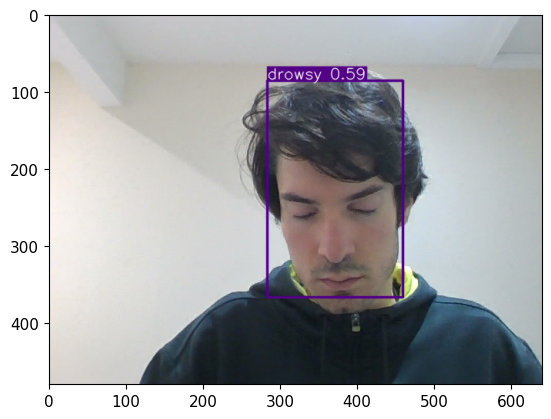

In [40]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [11]:
# We now allow our webcam to make detections

# We first access our webcam
cap = cv2.VideoCapture(0) #0, 1, 2 depending on which device capture. Video capture device 0
while cap.isOpened:  #Until our capture device is still Open
    ret, frame = cap.read() #return value plus the frame(image from webcam)
    
    # Make detections
    results = model(frame) #We use a YOLO Model and we pass the frame we gt from our webcam (same as for the previous images)
    
    cv2.imshow('YOLO', np.squeeze(results.render())) #When you render the top bar is gonna be name whaetver name we pass here (in this case YOLO)
    #results.render only returns the np array representation of the image. To render it we need to pass through a rendering function
    
    #Here we exit out out this gracefully:
    if cv2.waitKey(10) & 0xFF == ord('q'): # if the check passes, we are gonna break out of the while loop
        break 

#here we do some cleanup:
cap.release() #release our capture device (our webcam)
cv2.destroyAllWindows() # We destroy all the windows